In [97]:
import sympy as sy

x = sy.symbols('x')

n = 10

base = [ sy.Pow(x, i)  for i in range(n) ]

def dot(a, b):
    return sy.integrate( a*b,  (x, -1, 1) )

def dot2(a, b):
    return sy.integrate( a*b*sy.sqrt( 1 - sy.Pow(x, 2)) ,  (x, -1, 1) )

In [105]:
dots = []

for ei in base:
    row = []
    for ej in base:

        d = dot(ei, ej)
        row.append(d)

    dots.append(row)

dots = sy.Matrix(dots)
dots


Matrix([
[  2,    0,  2/3,    0,  2/5,    0,  2/7,    0,  2/9,    0],
[  0,  2/3,    0,  2/5,    0,  2/7,    0,  2/9,    0, 2/11],
[2/3,    0,  2/5,    0,  2/7,    0,  2/9,    0, 2/11,    0],
[  0,  2/5,    0,  2/7,    0,  2/9,    0, 2/11,    0, 2/13],
[2/5,    0,  2/7,    0,  2/9,    0, 2/11,    0, 2/13,    0],
[  0,  2/7,    0,  2/9,    0, 2/11,    0, 2/13,    0, 2/15],
[2/7,    0,  2/9,    0, 2/11,    0, 2/13,    0, 2/15,    0],
[  0,  2/9,    0, 2/11,    0, 2/13,    0, 2/15,    0, 2/17],
[2/9,    0, 2/11,    0, 2/13,    0, 2/15,    0, 2/17,    0],
[  0, 2/11,    0, 2/13,    0, 2/15,    0, 2/17,    0, 2/19]])

In [106]:
legendre = [ base[0] ]


for i in range(1, n):

    vi = base[i]
    ei = [  ei*dot(ei, vi)/dot(ei, ei) for ei in legendre ]
    ei = vi - sum(ei)
    legendre.append(ei)

In [107]:
dots = []

for ei in legendre:
    row = []
    for ej in legendre:

        d = dot(ei, ej)
        row.append(d)
    dots.append(row)

dots = sy.Matrix(dots)
dots   

Matrix([
[2,   0,    0,     0,         0,         0,          0,           0,               0,                0],
[0, 2/3,    0,     0,         0,         0,          0,           0,               0,                0],
[0,   0, 8/45,     0,         0,         0,          0,           0,               0,                0],
[0,   0,    0, 8/175,         0,         0,          0,           0,               0,                0],
[0,   0,    0,     0, 128/11025,         0,          0,           0,               0,                0],
[0,   0,    0,     0,         0, 128/43659,          0,           0,               0,                0],
[0,   0,    0,     0,         0,         0, 512/693693,           0,               0,                0],
[0,   0,    0,     0,         0,         0,          0, 512/2760615,               0,                0],
[0,   0,    0,     0,         0,         0,          0,           0, 32768/703956825,                0],
[0,   0,    0,     0,         0,         0,   

In [110]:
chebyshev = [ base[0] ]


for i in range(1, n):

    vi = base[i]
    ei = [  ei*dot2(ei, vi)/dot2(ei, ei) for ei in chebyshev ]
    ei = vi - sum(ei)
    print(ei)
    chebyshev.append(ei)

x
x**2 - 1/4
x**3 - x/2
x**4 - 3*x**2/4 + 1/16
x**5 - x**3 + 3*x/16
x**6 - 5*x**4/4 + 3*x**2/8 - 1/64


In [ ]:
dots = []

for ei in chebyshev:
    row = []
    for ej in chebyshev:

        d = dot2(ei, ej)
        row.append(d)
    dots.append(row)

dots = sy.Matrix(dots)
dots   

In [83]:
h = sy.sin(  3*x )*(1 - x**2)

num_coef = 4

monomios_coef = []
legendre_coef = []


for i in range(num_coef):

    mon_coef = dot(h, base[i]) / dot(base[i], base[i]) 
    monomios_coef.append(mon_coef)

    leg_coef = dot(h, legendre[i]) /  dot(legendre[i], legendre[i]) 
    legendre_coef.append(leg_coef)

In [84]:
hmon = sum( [ coef*ei for coef, ei in zip( monomios_coef, base[:num_coef] ) ]).simplify()
hleg = sum( [ coef*ei for coef, ei in zip( legendre_coef, legendre[:num_coef] ) ]).simplify()

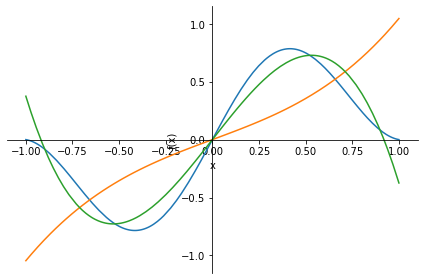

In [85]:
from sympy.plotting import plot

plot( (h , (x, -1, 1) ) ,
      (hmon, (x, -1, 1)),
      (hleg, (x, -1, 1))
)


In [86]:
a =  dot( h-hmon, h-hmon ).simplify() 
print("Monomos error", float(a))

b = dot( h-hleg, h-hleg ).simplify()
print("Legendre error", float(b))

Monomos error 0.46042078843284057
Legendre error 0.03408326409877644
